In [81]:
# importing various package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
 
    
f = 'data/EURUSD_Tick_Data_Jan-Feb_POC.csv'
data = pd.read_csv(f)

In [82]:
data

,Datetime,Bid,Ask,AveragePrice,PocPrice,Volume
0,20230101 22:04:01.067,1.06970,1.07092,1.070310,NaN,1.0
1,20230101 22:04:38.111,1.06974,1.07092,1.070330,NaN,1.0
2,20230101 22:04:44.112,1.06970,1.07092,1.070310,NaN,1.0
3,20230101 22:04:45.871,1.06974,1.07092,1.070330,NaN,1.0
4,20230101 22:04:46.551,1.06970,1.07092,1.070310,NaN,1.0
...,...,...,...,...,...,...
5658743,20230228 23:59:54.330,1.05767,1.05772,1.057695,1.058285,4.0
5658744,20230228 23:59:56.038,1.05768,1.05772,1.057700,1.058285,1.0
5658745,20230228 23:59:56.346,1.05767,1.05771,1.057690,1.058285,4.0
5658746,20230228 23:59:56.850,1.05765,1.05772,1.057685,1.058285,6.0


In [83]:
data_filtered = data.iloc[::200, :] # filter every 200 ticks/rows
data_filtered 

,Datetime,Bid,Ask,AveragePrice,PocPrice,Volume
0,20230101 22:04:01.067,1.06970,1.07092,1.070310,NaN,1.0
200,20230101 22:46:52.631,1.06947,1.07009,1.069780,NaN,4.0
400,20230101 22:47:34.846,1.06950,1.07012,1.069810,NaN,4.0
600,20230101 22:50:15.124,1.06879,1.06944,1.069115,NaN,1.0
800,20230101 23:13:58.748,1.06949,1.07006,1.069775,NaN,1.0
...,...,...,...,...,...,...
5657800,20230228 23:34:38.762,1.05767,1.05774,1.057705,1.058285,5.0
5658000,20230228 23:40:23.426,1.05783,1.05789,1.057860,1.058285,4.0
5658200,20230228 23:46:12.227,1.05783,1.05789,1.057860,1.058285,1.0
5658400,20230228 23:49:32.276,1.05769,1.05775,1.057720,1.058285,5.0


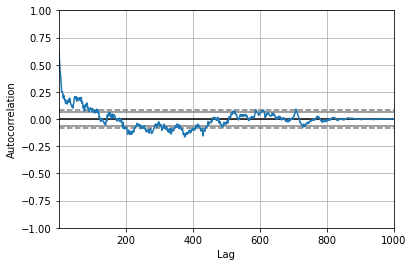

In [84]:
# plot autocorrelation of Bid Prices on first 1000 rows
x = pd.plotting.autocorrelation_plot(data['Bid'].head(1000))
x.plot()
plt.show()

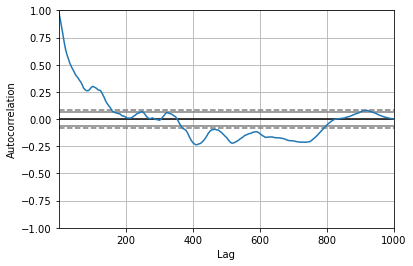

In [85]:
# plot autocorrelation of the diff between (bid - POCPrice) last 1000 rows
x = pd.plotting.autocorrelation_plot(data['Bid'].tail(1000) - data['PocPrice'].tail(1000))
x.plot()
plt.show()

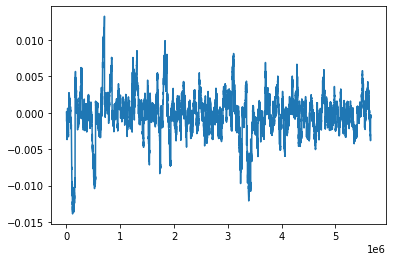

In [86]:
# plot diff of (bid - POCPrice) on all filtered rows
z = pd.Series(data_filtered['Bid'] - data_filtered['PocPrice'])
z = z.dropna()
z.plot()
plt.show()

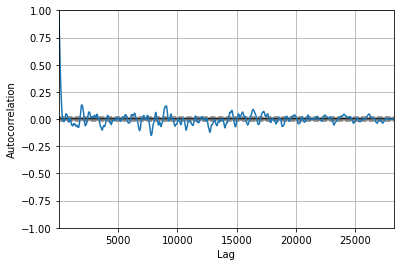

In [87]:
# plot autocorrelation of all filtered rows
x = pd.plotting.autocorrelation_plot(z)
x.plot()
plt.show()

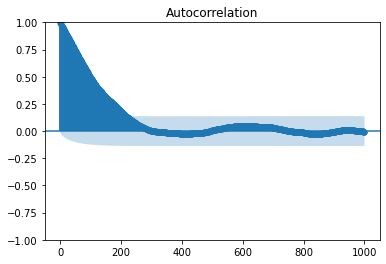

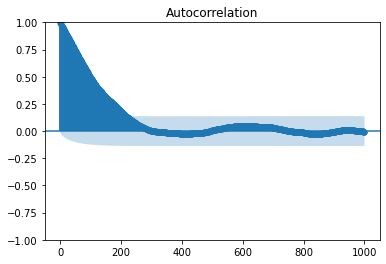

In [88]:
# library for autocorrelation with a lag variable. Same test as previous cell

# import the plotting functions for act and pacf  
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(z, lags=1000)

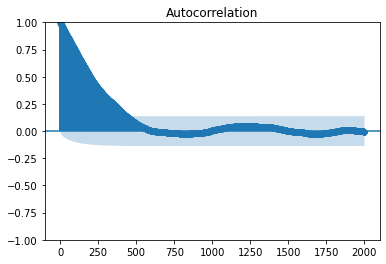

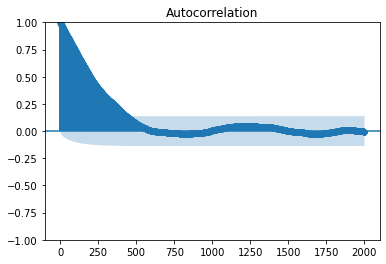

In [90]:
# import the plotting functions for act and pacf  
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data_filtered = data.iloc[::100, :]
z = pd.Series(data_filtered['Bid'] - data_filtered['PocPrice'])
z = z.dropna()
plot_acf(z, lags=2000)

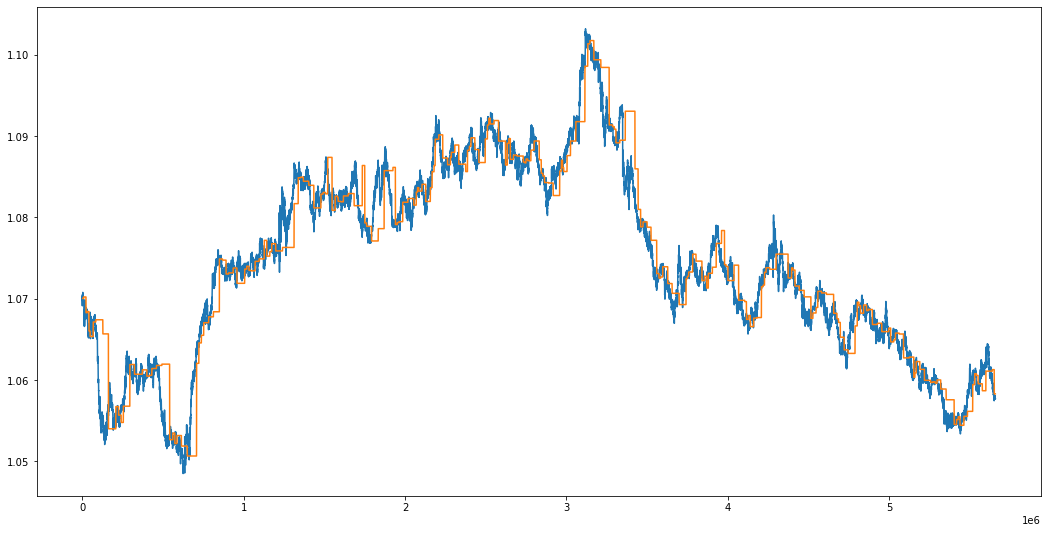

In [91]:
# plot POC ontop of price. Like a moving avg
plt.figure(1, figsize=(18, 9))
((data_filtered['Bid'] + data_filtered['Ask']) / 2).plot()
data_filtered['PocPrice'].plot()
plt.show()